## Patrones K-means

In [6]:
import math

def distancia(l1, l2):
    if len(l1) == len(l2):
        return math.dist(l1, l2)
    else:
        print("Ingrese dos listas del mismo tamaño")
        return None  

def cercanos(puntos, centros):
    if all(isinstance(i, list) for i in puntos) and all(isinstance(i, list) for i in centros):
        k = len(centros)
        listas_cercanas = [[] for _ in range(k)]

        for punto in puntos:
            distancia_minima = float('inf') 
            indice_centro_cercano = None

            for i, centro in enumerate(centros):
                d = distancia(punto, centro)
                if d < distancia_minima:
                    distancia_minima = d
                    indice_centro_cercano = i

            listas_cercanas[indice_centro_cercano].append(punto)

        return listas_cercanas
    else:
        print("Ambos argumentos deben ser listas de listas")
        return None 

import random

def promedio(lista_puntos):
    n = len(lista_puntos)
    if n == 0:
        return None
    suma = [0] * len(lista_puntos[0])
    for punto in lista_puntos:
        suma = [suma[i] + punto[i] for i in range(len(punto))]
    return [x / n for x in suma]

def centros(listas):
    nuevos_centros = [promedio(lista) for lista in listas if lista]
    return nuevos_centros

def k_means(puntos, k, iteraciones=100):
    if k <= 0 or k > len(puntos):
        print("El valor de k no es válido.")
        return None

    centros_iniciales = random.sample(puntos, k)

    for _ in range(iteraciones):
        grupos = cercanos(puntos, centros_iniciales)
        nuevos_centros = centros(grupos)

        if nuevos_centros is None:
            print("Uno o más grupos están vacíos. Prueba con un valor de k diferente.")
            return None

        centros_iniciales = nuevos_centros

    return centros_iniciales

puntos = [[1, 2], [2, 3], [3, 4], [8, 9], [9, 10], [10, 11]]
k = 2
centros = k_means(puntos, k)
print("Nuevos centros:", centros)



Nuevos centros: [[2.0, 3.0], [9.0, 10.0]]


In [7]:
from sklearn.cluster import KMeans

puntos = [[1, 2], [2, 3], [3, 4], [8, 9], [9, 10], [10, 11]]

k = 2

modelo_kmeans = KMeans(n_clusters=k, random_state=0)

modelo_kmeans.fit(puntos)

centros_sklearn = modelo_kmeans.cluster_centers_

print("Centros obtenidos con scikit-learn:", centros_sklearn)

Centros obtenidos con scikit-learn: [[ 9. 10.]
 [ 2.  3.]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Evaluable

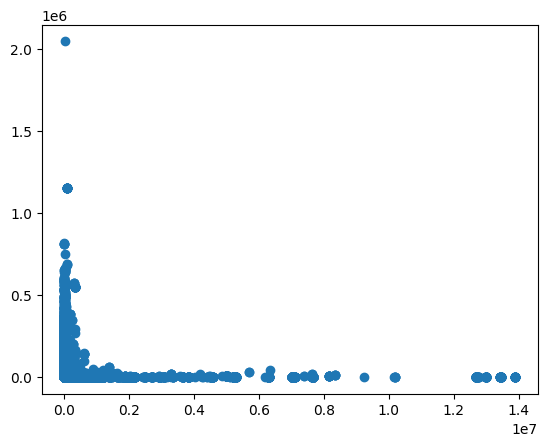

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('covid19_tweets.csv')

var=[]
for j in range(len(df["user_followers"])):
  var.append([df["user_followers"][j],df["user_favourites"][j]])


var2=np.array(var)
plt.scatter(var2[:,0],var2[:,1])

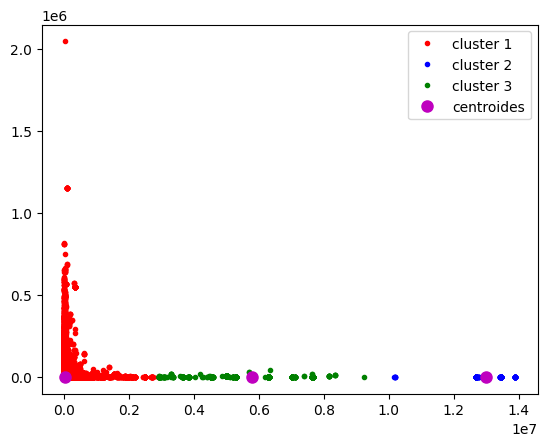

In [27]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

plt.plot(var2[etiquetas==0,0],var2[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(var2[etiquetas==1,0],var2[etiquetas==1,1],'b.', label='cluster 2')
plt.plot(var2[etiquetas==2,0],var2[etiquetas==2,1],'g.', label='cluster 3')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

In [28]:


sns.boxplot(x=data['user_followers'])
plt.title('Diagrama de Caja y Bigotes para user_followers')
plt.show()

NameError: name 'sns' is not defined

In [ ]:
plt.hist(data['user_followers'], bins=20)
plt.title('Histograma para user_followers')
plt.xlabel('Número de seguidores')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()